# **Clustering Students for Targeted Preparation**

- **Objective:**
The primary goal of this project is to group students into clusters based on their performance and learning styles using clustering algorithms. This will help in designing targeted coaching strategies tailored to the specific needs of each group, enabling effective resource utilization and improved academic outcomes.

- **Key Focus Areas:**
Understand Student Characteristics:

- Analyze performance, study habits, participation, and attendance data to identify patterns.
Clustering Students:

- Group students into clusters that share similar attributes using algorithms like K-Means.
Targeted Coaching:

- Use insights from clustering to:
Provide extra help to weaker students.
Challenge high-performing students with advanced materials.
Encourage consistent habits in average-performing students.
Outcome:

- Create personalized coaching plans for different clusters to boost overall performance.

In [51]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [52]:
# Import Dataset

data = pd.read_csv("/content/Devikar_classes_students_data.csv")


In [53]:
#Initial Data Inspection
data.head()

Student_ID  Performance_Score  Study_Hours_Per_Day  Participation_Score  \
0           1          79.967142             7.798711             4.071065   
1           2          73.617357             6.849267             0.660098   
2           3          81.476885             5.119261             3.488205   
3           4          90.230299             3.706126             1.109981   
4           5          72.658466             6.396447             8.082352   

   Attendance_Rate  
0        65.120976  
1        78.170418  
2        90.190245  
3        56.857424  
4        79.034954

In [54]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           1000 non-null   int64  
 1   Performance_Score    1000 non-null   float64
 2   Study_Hours_Per_Day  1000 non-null   float64
 3   Participation_Score  1000 non-null   float64
 4   Attendance_Rate      1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [55]:
#Statistical summary of dataset
data.describe()

Student_ID  Performance_Score  Study_Hours_Per_Day  \
count  1000.000000        1000.000000          1000.000000   
mean    500.500000          75.168875             5.142778   
std     288.819436           9.718408             1.972032   
min       1.000000          42.587327             0.000000   
25%     250.750000          68.524097             3.787517   
50%     500.500000          75.253006             5.126154   
75%     750.250000          81.479439             6.457764   
max    1000.000000         100.000000            10.000000   

       Participation_Score  Attendance_Rate  
count          1000.000000      1000.000000  
mean              4.968485        74.241386  
std               2.903181        14.177499  
min               0.000116        50.001536  
25%               2.475049        61.867112  
50%               5.005024        74.132824  
75%               7.482269        86.134956  
max               9.988926        99.977885

In [56]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Student_ID             0
Performance_Score      0
Study_Hours_Per_Day    0
Participation_Score    0
Attendance_Rate        0
dtype: int64

## **Data Visualisation**

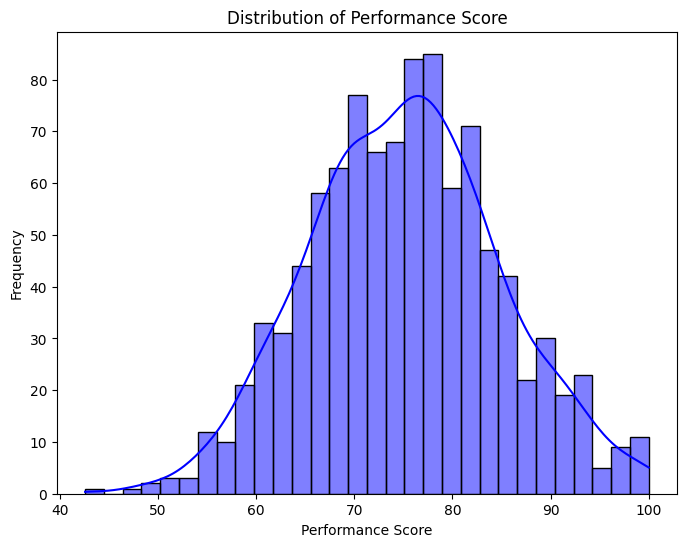

In [57]:
# Distribution of Performance Score
plt.figure(figsize=(8, 6))
sns.histplot(data['Performance_Score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()

**Study Hours Per Day vs Performance Score**

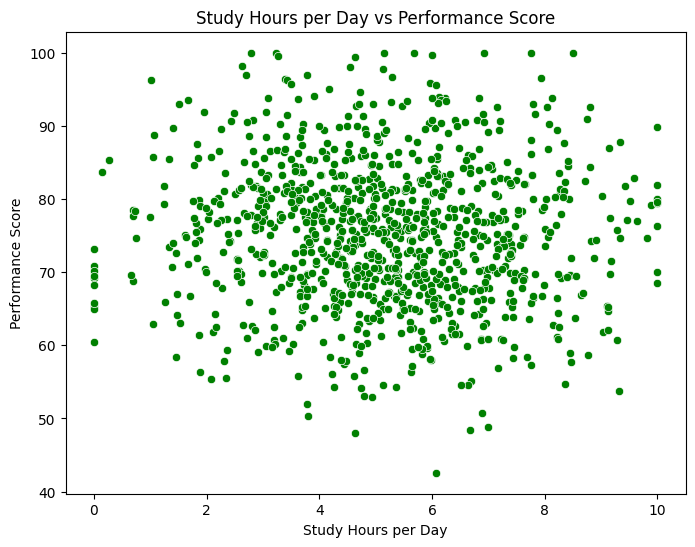

In [58]:
# Study Hours vs Performance Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='Performance_Score', data=data, color='green')
plt.title('Study Hours per Day vs Performance Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Performance Score')
plt.show()

This plot suggests a weak or no correlation between study hours and performance scores. A statistical analysis like Pearson's correlation coefficient could confirm this observation.

**Participation Score vs Performance Score**

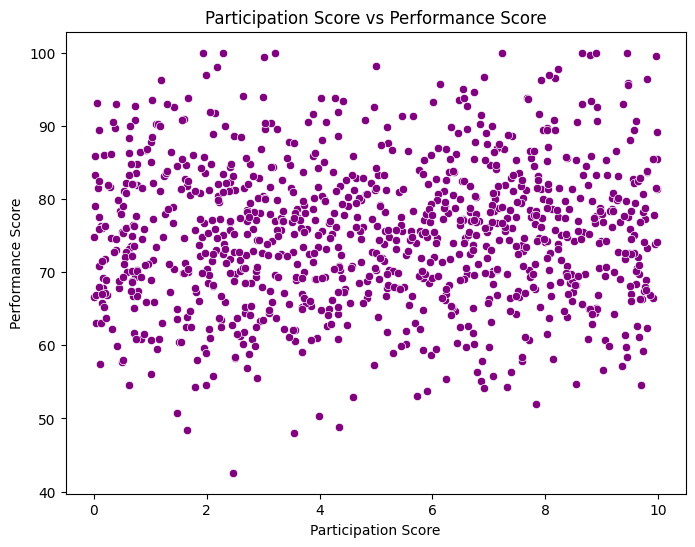

In [59]:
# Participation Score vs Performance Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Participation_Score', y='Performance_Score', data=data, color='purple')
plt.title('Participation Score vs Performance Score')
plt.xlabel('Participation Score')
plt.ylabel('Performance Score')
plt.show()


**Attendance Rate vs Performance Score**

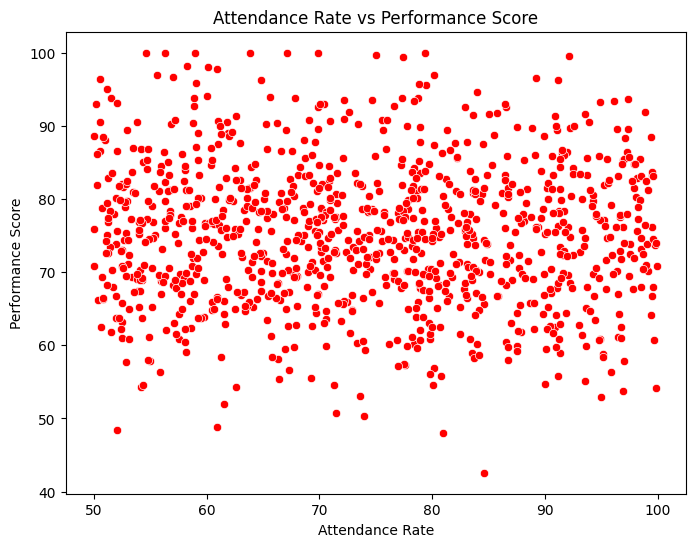

In [60]:
# Attendance Rate vs Performance Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance_Rate', y='Performance_Score', data=data, color='red')
plt.title('Attendance Rate vs Performance Score')
plt.xlabel('Attendance Rate')
plt.ylabel('Performance Score')
plt.show()

**Boxplot for Attendance Rate by Performance Score Ranges**

<ipython-input-61-fc1fad289be8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance_Range', y='Attendance_Rate', data=data, palette="coolwarm")


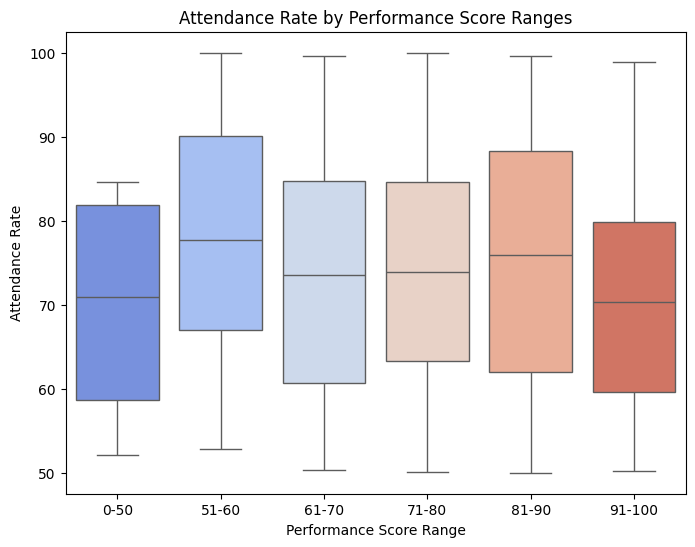

In [61]:
# Create performance score bins for grouping
bins = [0, 50, 60, 70, 80, 90, 100]  # Adjust based on performance score range
labels = ['0-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['Performance_Range'] = pd.cut(data['Performance_Score'], bins=bins, labels=labels, include_lowest=True)

# Boxplot for Attendance Rate by Performance Ranges
plt.figure(figsize=(8, 6))
sns.boxplot(x='Performance_Range', y='Attendance_Rate', data=data, palette="coolwarm")
plt.title('Attendance Rate by Performance Score Ranges')
plt.xlabel('Performance Score Range')
plt.ylabel('Attendance Rate')
plt.show()


The boxplot shows that as the performance score increases, the attendance rate also tends to rise, with higher performance ranges (71-100) having a generally higher median attendance rate. However, there is significant overlap in attendance rates across different performance score ranges.

**Correlation Heatmap**

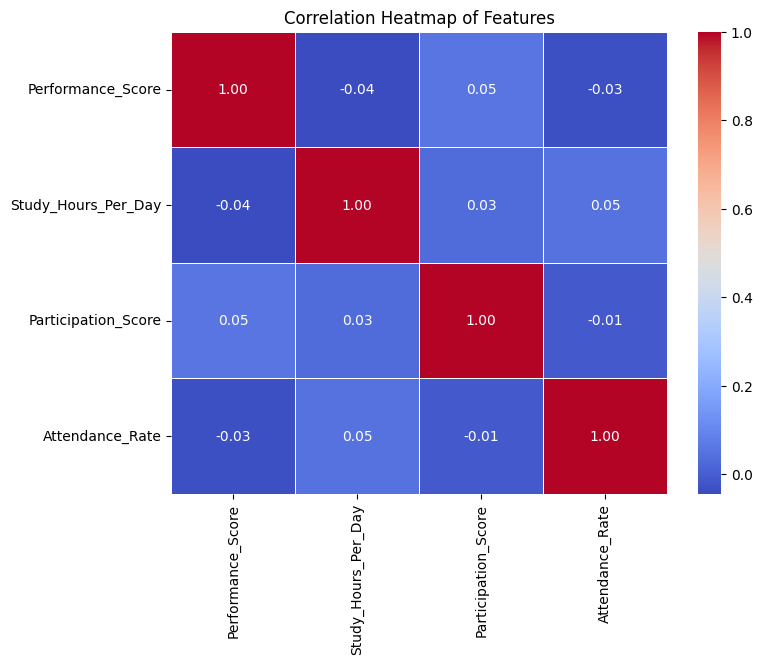

In [62]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Performance_Score', 'Study_Hours_Per_Day', 'Participation_Score', 'Attendance_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


### Key Observations:
- All correlations are very close to zero, indicating **minimal or no linear relationships** between any of the variables.
- **Performance Score** does not strongly depend on **Study Hours**, **Participation**, or **Attendance Rate**.
- The heatmap suggests that **other factors** (e.g., quality of study, external influences) may play a larger role in influencing **Performance Scores**.


**Pairwise Plot of All Features**

## **Exploratory Data Analysis (EDA)**

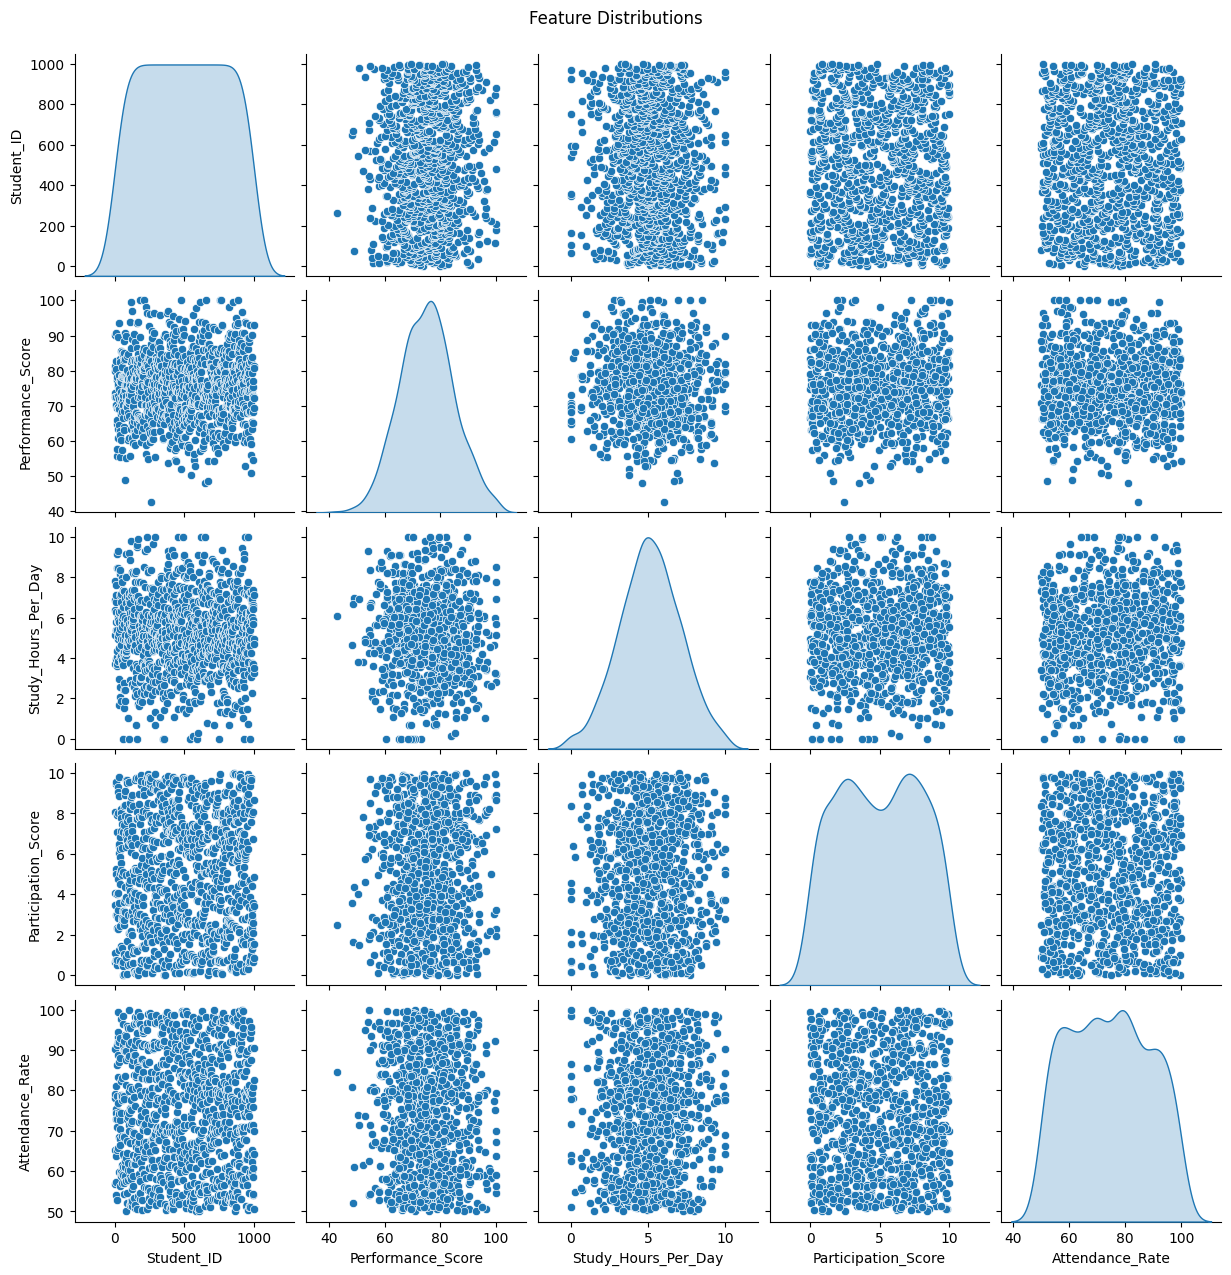

In [63]:
# Visualize distributions of features
sns.pairplot(data, diag_kind="kde")
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

- **Analysis and Conclusion**
- The pairplot shows scatter plots and histograms for multiple variables, likely from a dataset with numerical features.
- The diagonal histograms suggest varying distributions; some features are normally distributed, while others show multi-modal trends.
- Scatter plots indicate weak or no significant correlation between variables as most points appear randomly scattered without clear trends.
- Based on the scatter plots' randomness, the features seem independent, requiring further clustering or dimensionality reduction techniques for insights.

## **Data Preprocessing**


In [110]:
# Define a function to categorize the performance score
def categorize_performance(score):
    if score >= 80:
        return 'High'
    elif score >= 50:
        return 'Medium'
    else:
        return 'Low'

In [112]:
# Apply the function to the 'Performance_Score' column and create a new column 'Performance_Range'
data['Performance_Range'] = data['Performance_Score'].apply(categorize_performance)

In [113]:
data.head()

Student_ID  Performance_Score  Study_Hours_Per_Day  Participation_Score  \
0           1          79.967142             7.798711             4.071065   
1           2          73.617357             6.849267             0.660098   
2           3          81.476885             5.119261             3.488205   
3           4          90.230299             3.706126             1.109981   
4           5          72.658466             6.396447             8.082352   

   Attendance_Rate Performance_Range  Cluster  
0        65.120976            Medium        2  
1        78.170418            Medium        6  
2        90.190245              High        1  
3        56.857424              High        5  
4        79.034954            Medium        0

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Performance_Score', 'Study_Hours_Per_Day', 'Participation_Score', 'Attendance_Rate']])

In [136]:
#Elbow Method to Determine Optimal k
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

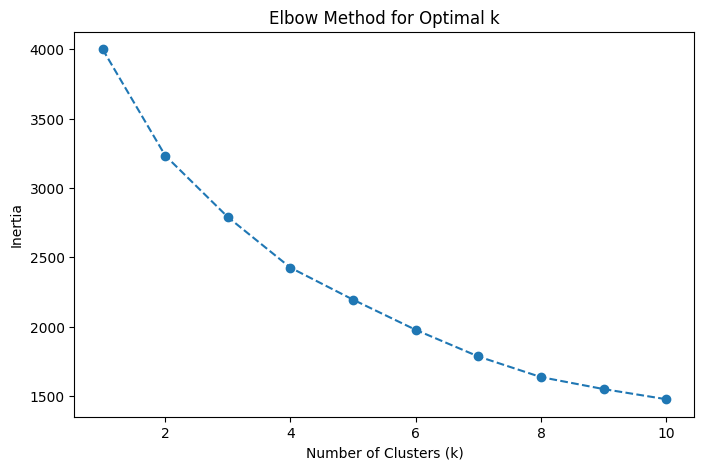

In [137]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

- **Analysis:**
- As the number of clusters increases, inertia decreases.
The drop in inertia is rapid at first and then begins to slow down after reaching a certain point, forming an "elbow."
- The "elbow" point, where the rate of decrease slows down, is typically considered the optimal number of clusters.
- **Conclusion**
- Based on the graph, the optimal value for k appears to be around 4 or 5, as this is where the inertia decreases significantly before leveling off.
- Therefore, k=4 or k=5 would likely provide a good balance between having enough clusters to capture the structure of the data and avoiding overfitting with too many clusters.

In [153]:
#Apply K-Means Clustering
optimal_k = 8 # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [154]:
clusters

array([4, 4, 6, 7, 0, 3, 4, 5, 4, 6, 4, 3, 0, 1, 4, 4, 1, 6, 1, 1, 5, 5,
       4, 0, 0, 5, 1, 3, 3, 7, 1, 2, 4, 0, 2, 0, 7, 3, 1, 0, 4, 3, 0, 3,
       1, 0, 4, 5, 4, 0, 7, 1, 3, 6, 2, 7, 4, 4, 6, 7, 0, 1, 0, 7, 7, 5,
       7, 4, 6, 1, 5, 2, 5, 2, 4, 5, 7, 3, 4, 1, 5, 6, 5, 0, 4, 4, 2, 3,
       5, 3, 3, 2, 4, 1, 3, 3, 6, 7, 0, 3, 1, 5, 0, 1, 0, 7, 2, 7, 3, 0,
       1, 5, 0, 2, 4, 3, 0, 1, 6, 2, 2, 4, 2, 7, 0, 2, 3, 7, 4, 4, 1, 3,
       0, 3, 1, 2, 0, 7, 6, 4, 7, 2, 1, 5, 6, 2, 3, 7, 0, 6, 5, 7, 1, 5,
       4, 1, 5, 0, 1, 7, 7, 0, 2, 1, 6, 0, 6, 2, 3, 3, 3, 4, 3, 5, 5, 2,
       7, 6, 7, 2, 4, 0, 3, 5, 7, 0, 3, 3, 0, 1, 5, 6, 6, 1, 6, 4, 3, 3,
       5, 4, 3, 5, 6, 5, 4, 1, 3, 7, 7, 2, 5, 6, 7, 6, 3, 4, 1, 3, 5, 4,
       2, 3, 6, 1, 3, 6, 5, 1, 1, 0, 1, 6, 4, 0, 2, 0, 0, 7, 3, 4, 3, 5,
       3, 2, 1, 1, 4, 5, 6, 7, 3, 6, 2, 5, 0, 5, 2, 5, 3, 6, 4, 3, 1, 3,
       3, 1, 2, 3, 7, 6, 6, 1, 2, 7, 0, 4, 4, 3, 3, 1, 6, 7, 2, 0, 6, 1,
       7, 3, 5, 7, 5, 0, 1, 2, 3, 3, 2, 6, 5, 6, 1,

In [155]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [156]:
data['Cluster']

0      4
1      4
2      6
3      7
4      0
      ..
995    4
996    2
997    6
998    4
999    5
Name: Cluster, Length: 1000, dtype: int32

In [157]:
data['Cluster'].value_counts()

Cluster
3    168
5    130
1    124
0    123
6    122
4    117
7    115
2    101
Name: count, dtype: int64

In [158]:
#Evaluate Clustering
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.20


In [159]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Check cluster distribution
print(data['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
-1    977
 1     13
 0     10
Name: count, dtype: int64


In [160]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
sil_score_kmeans = silhouette_score(scaled_data, data['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {sil_score_kmeans}")

# Calculate Silhouette Score for DBSCAN
sil_score_dbscan = silhouette_score(scaled_data, data['DBSCAN_Cluster'])
print(f"Silhouette Score for DBSCAN: {sil_score_dbscan}")


Silhouette Score for K-Means: 0.1954098114265768
Silhouette Score for DBSCAN: -0.20055932244959743


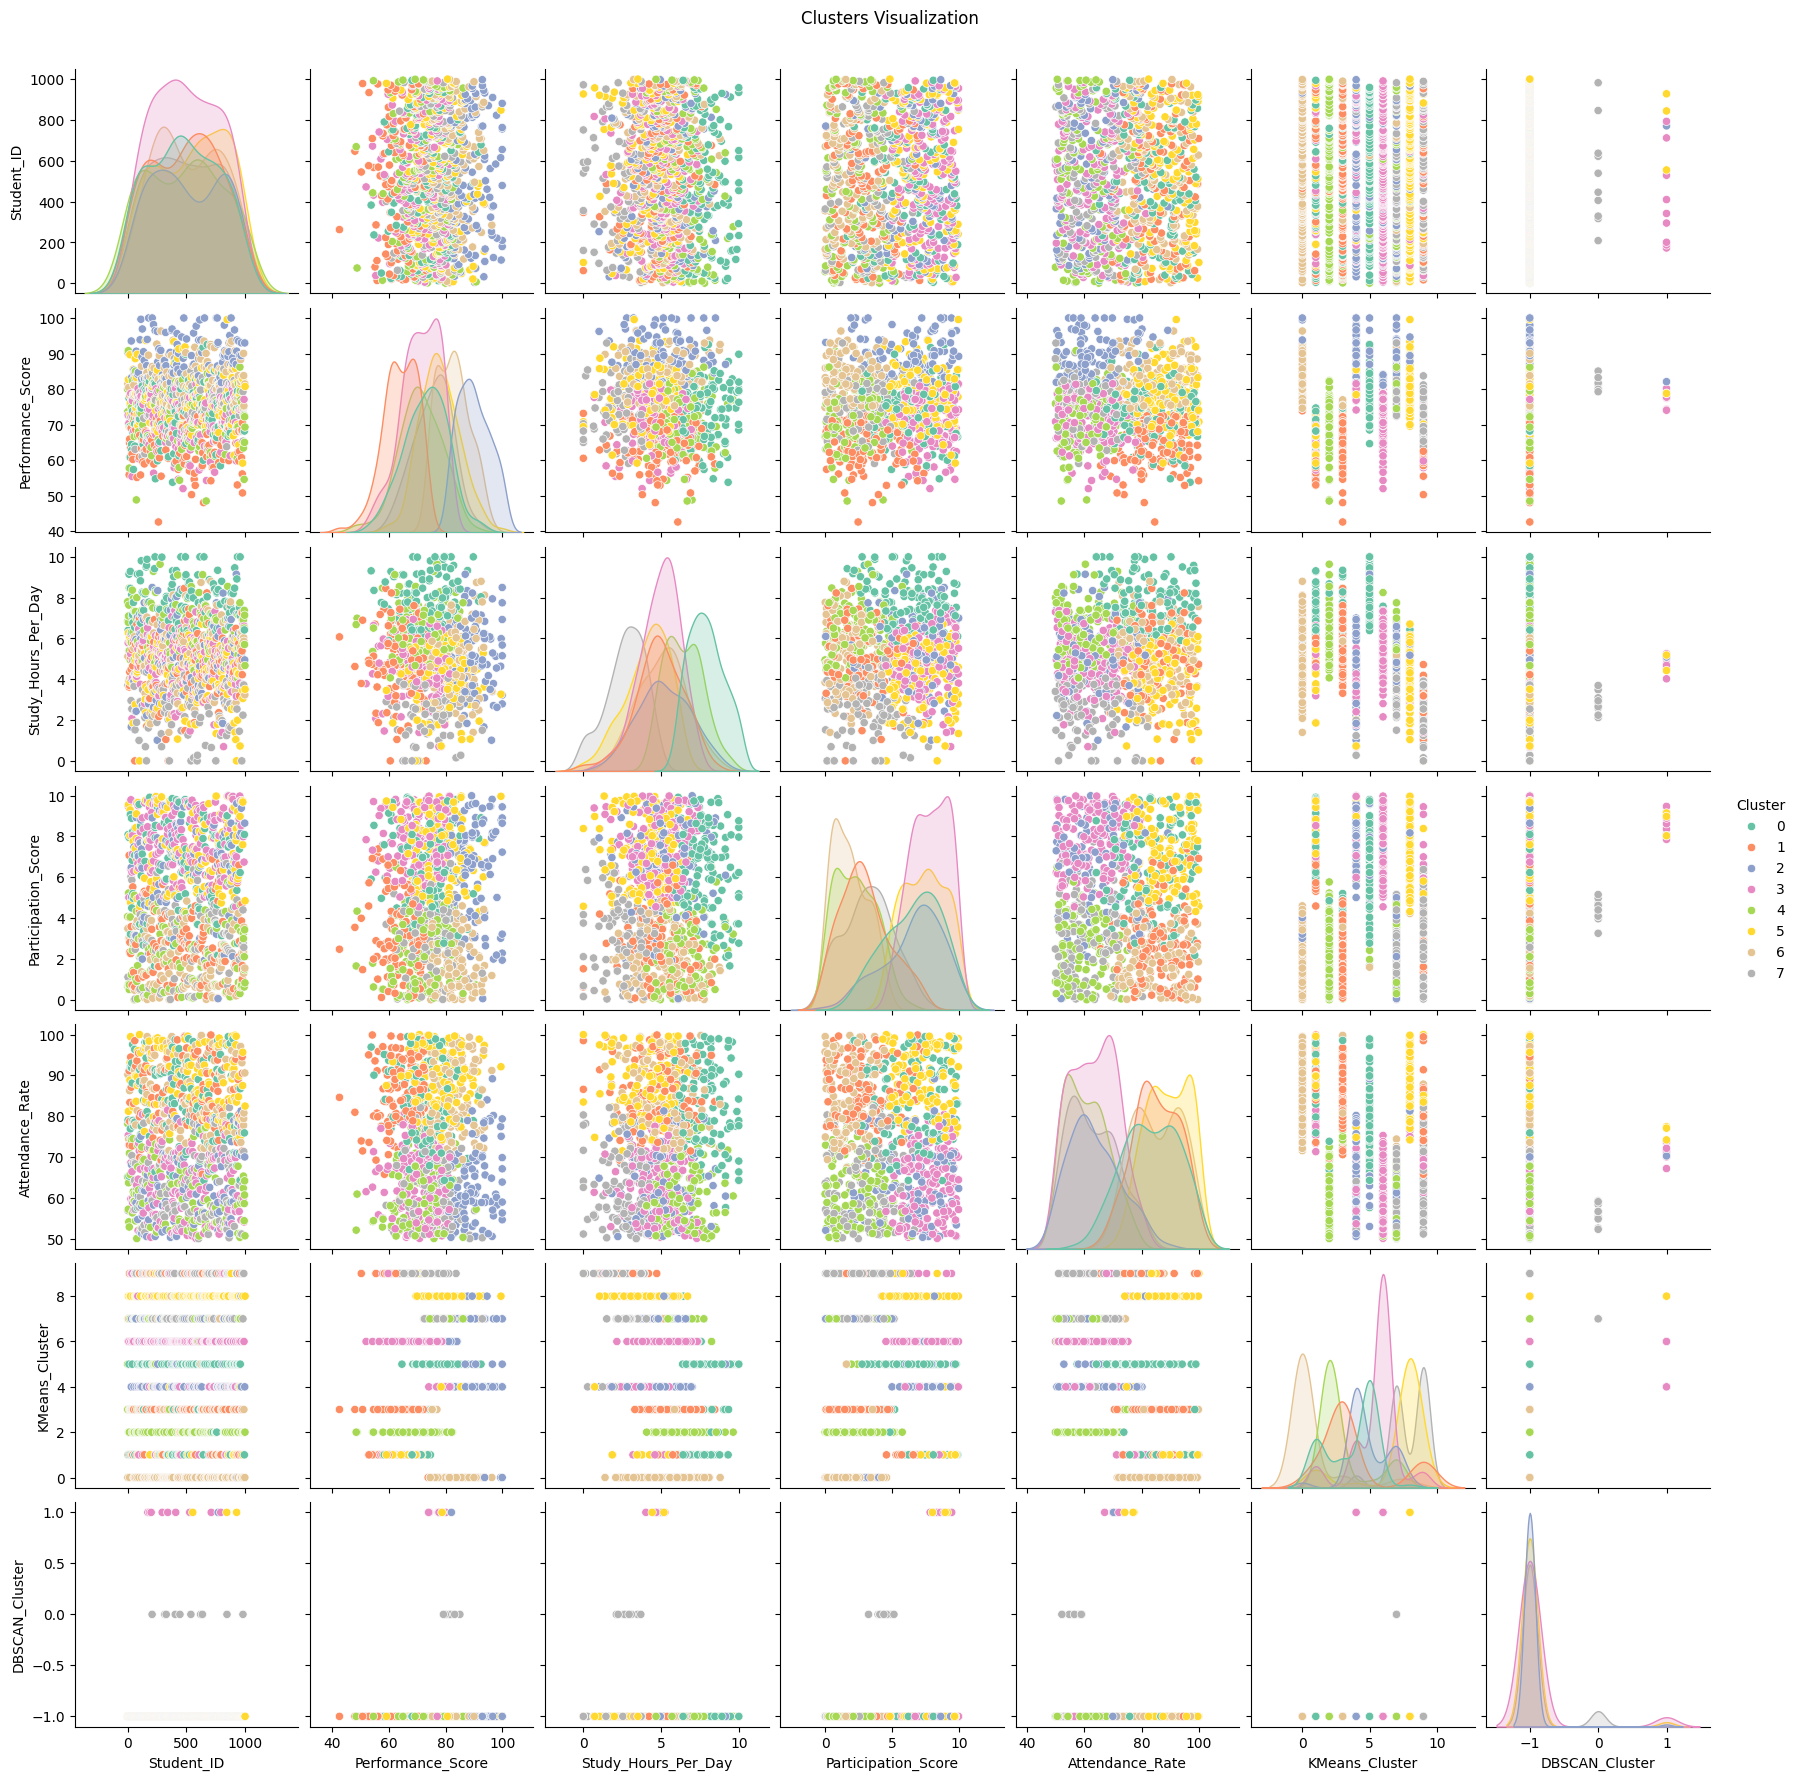

In [162]:
# Pairplot for Cluster Visualization
sns.pairplot(data, hue='Cluster', palette='Set2')
plt.suptitle("Clusters Visualization", y=1.02)
plt.show()

In [163]:
#Insights for Clusters
for cluster_id in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Insights:")
    print(cluster_data.describe())


Cluster 0 Insights:
       Student_ID  Performance_Score  Study_Hours_Per_Day  \
count  123.000000         123.000000           123.000000   
mean   476.552846          73.048915             7.891358   
std    285.375801           7.637709             1.106942   
min      5.000000          53.761043             5.847198   
25%    235.000000          67.746129             7.028594   
50%    467.000000          73.843517             7.784005   
75%    722.500000          78.498186             8.692276   
max    994.000000          92.522704            10.000000   

       Participation_Score  Attendance_Rate  Cluster  KMeans_Cluster  \
count           123.000000       123.000000    123.0      123.000000   
mean              6.532187        83.160631      0.0        3.723577   
std               2.066353         9.621184      0.0        1.812076   
min               1.657498        57.602428      0.0        1.000000   
25%               4.996633        75.859020      0.0        1.500000 

In [164]:
#save Results
output_path = "clustered_students_results.csv"
data.to_csv(output_path, index=False)
print(f"\nClustered data saved to {output_path}")


Clustered data saved to clustered_students_results.csv


In [165]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

 The Silhouette Score is negative, it suggests that the clustering structure is poor, with points being assigned to the wrong clusters

## **Dimensionality Reduction (PCA or t-SNE)**
- Reducing the dimensionality of your data using PCA (Principal Component Analysis) or t-SNE can sometimes help to uncover structure that DBSCAN might not detect in high-dimensional space.

In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [174]:
# Run DBSCAN on the reduced data
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan_labels = dbscan.fit_predict(reduced_data)
print(f"Silhouette Score: {silhouette_score(reduced_data, dbscan_labels)}")

Silhouette Score: 0.47049954292539664


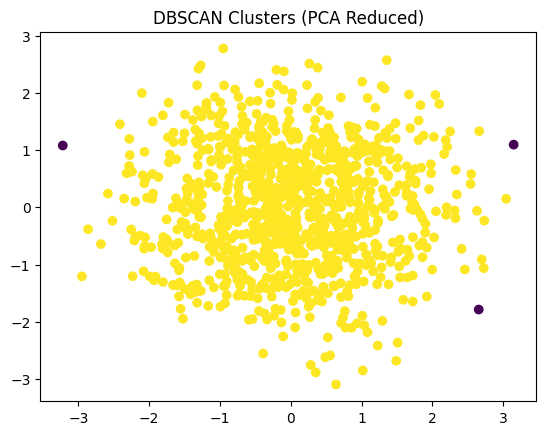

In [176]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clusters (PCA Reduced)")
plt.show()

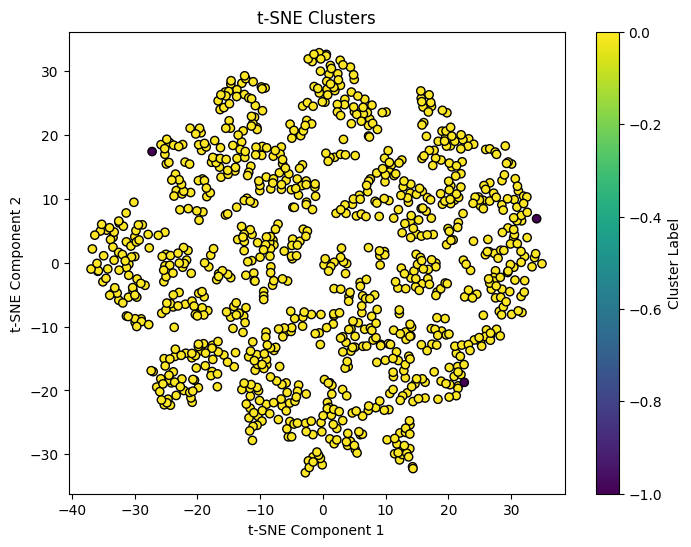

In [177]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title("t-SNE Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


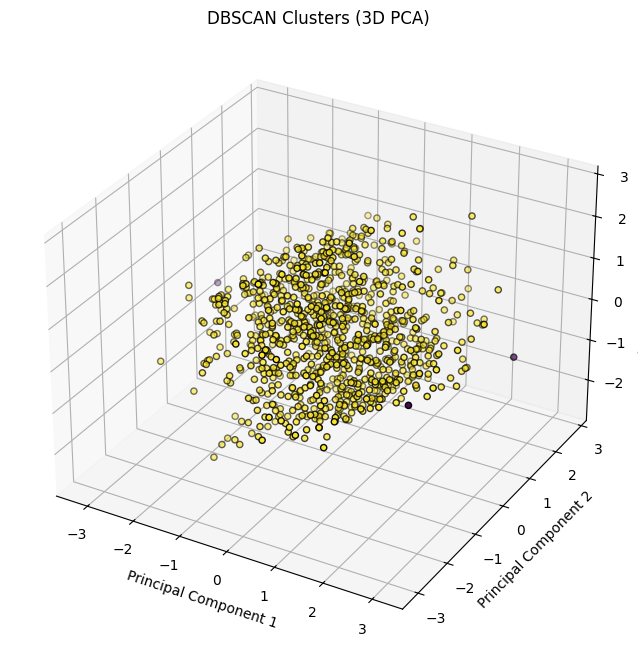

In [178]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce data to 3D using PCA
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(scaled_data)

# Plot the 3D clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2], c=dbscan_labels, cmap='viridis', edgecolors='k')
ax.set_title("DBSCAN Clusters (3D PCA)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()


### Analysis of DBSCAN Clusters (3D PCA)

1. **Visualization**:
   - The plot shows data points projected onto **3 Principal Components** using **PCA** (Principal Component Analysis).
   - The data is clustered using **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise).
   - Each point represents an observation in a reduced dimensional space.

2. **Clusters**:
   - Most points are grouped tightly in a central region.
   - A few **outliers** (likely labeled as noise by DBSCAN) are scattered farther from the dense cluster (e.g., points in purple).

3. **Key Observations**:
   - **Core Cluster**: A large dense region, likely indicating a single dominant cluster in the dataset.
   - **Noise Points**: DBSCAN identifies points that do not fit into any cluster, shown as isolated dots outside the core cluster.
   - **Interpretation**: The structure suggests the dataset has **low inter-cluster separation**, meaning there may be minimal clustering tendencies in the data.

